In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
import src.model.flow_ot as flow_ot
import src.eval.monitor as monitor
import importlib 

sns.set_theme(style="whitegrid")

In [4]:
np.random.seed(1)
# set parameters for the gaussian experiment
MEAN_A  = -2
MEAN_B  = 2
SIZE_A  = 100
STD_A   = 1.0
STD_B   = 1.0
SIZE_B  = 100
# generate the gaussian samples
gauss_a = np.random.normal(MEAN_A, STD_A, SIZE_A)
gauss_b = np.random.normal(MEAN_B, STD_B, SIZE_B)
# re-organize into the X and Z matrices
X = np.concatenate((gauss_a, gauss_b)).reshape((SIZE_A + SIZE_B, 1))
Z = np.concatenate((np.zeros(SIZE_A), np.full(SIZE_B, 1))).reshape((SIZE_A + SIZE_B, 1))

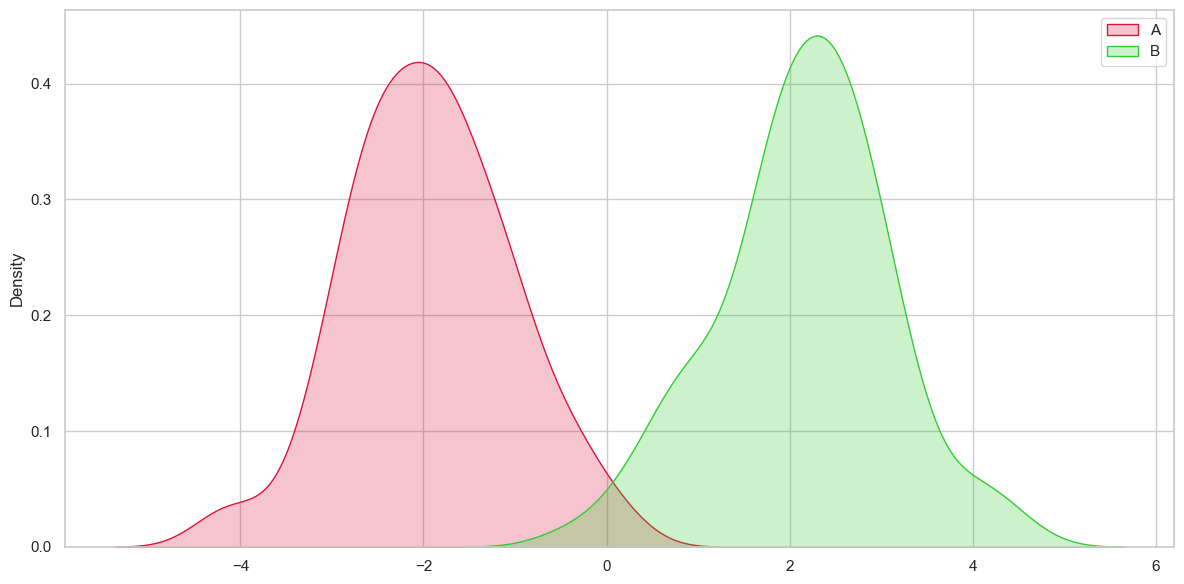

In [5]:
# plot the density estimations of the two gaussian distributions
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data=gauss_a,
            color='crimson', label='A', fill=True, ax=ax)
sns.kdeplot(data=gauss_b,
            color='limegreen', label='B', fill=True, ax=ax)
ax.legend()
plt.tight_layout()
plt.show()

In [6]:
importlib.reload(monitor)
# set specific monitor reporting functions 
def kde_barycenter_points(y, gauss_a, gauss_b, lam, gradient_norm, iter): 
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.kdeplot(data=gauss_a,
                color='crimson', label='A', fill=True, ax=ax)
    sns.kdeplot(data=gauss_b,
                color='limegreen', label='B', fill=True, ax=ax)
    sns.kdeplot(data=y, 
                color='purple', label='y', fill=True, ax=ax)
    ax.legend()
    plt.text(x = 4, y = -0.05, s = rf"Iteration {iter}")
    plt.text(x = 4, y = -0.075, s = rf"$\lambda$: {lam}", weight = "bold")
    plt.text(x = 4, y = -0.1, s = rf"$\| \nabla L\|$:{gradient_norm}")
    plt.title(f"Barycenter Estimation")
    plt.show()
    
def gauss_param_constructor(fixed_params, shift_params): 
    return (shift_params["y"], fixed_params["gauss_a"], fixed_params["gauss_b"], 
            shift_params["Lambda"], shift_params["Gradient Norm"], shift_params["Iteration"])

# set monitoring variables 
FIXED_PARAMS = {"gauss_a": gauss_a, "gauss_b": gauss_b}
REPORT_SKIP = 100
# create the monitor
gaussian_monitor = monitor.Monitor(kde_barycenter_points, gauss_param_constructor, FIXED_PARAMS, REPORT_SKIP)

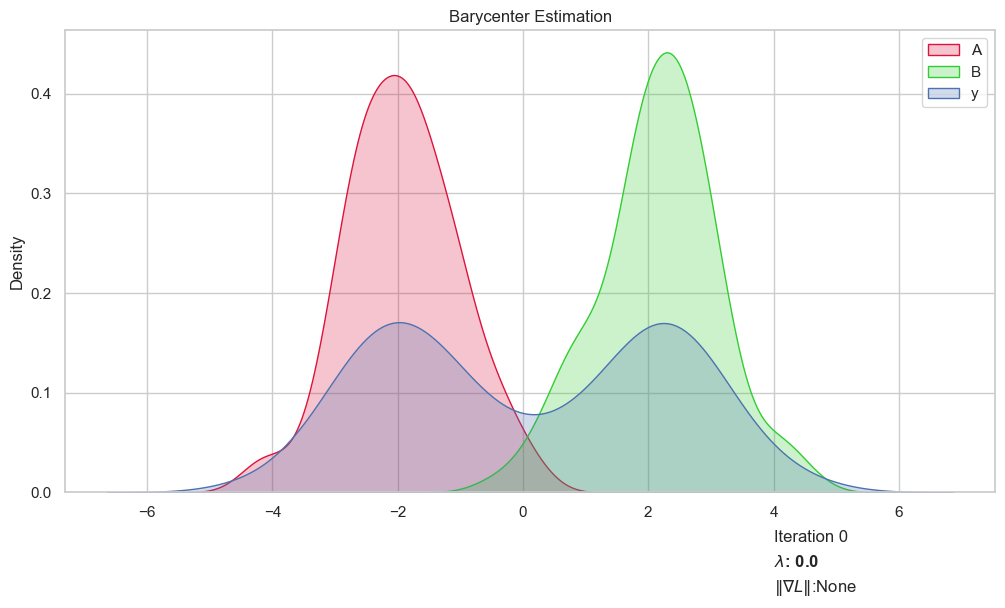

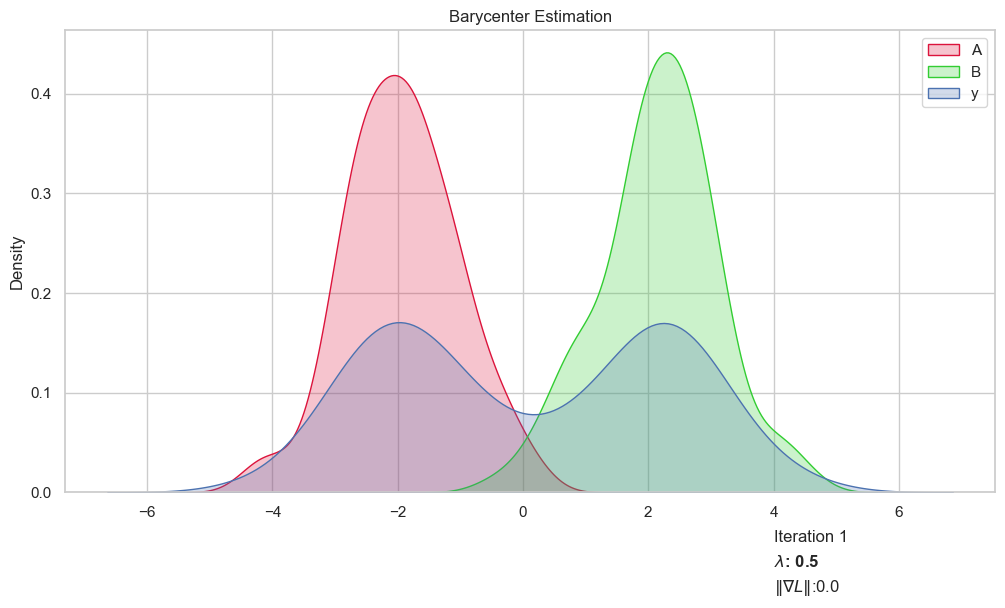

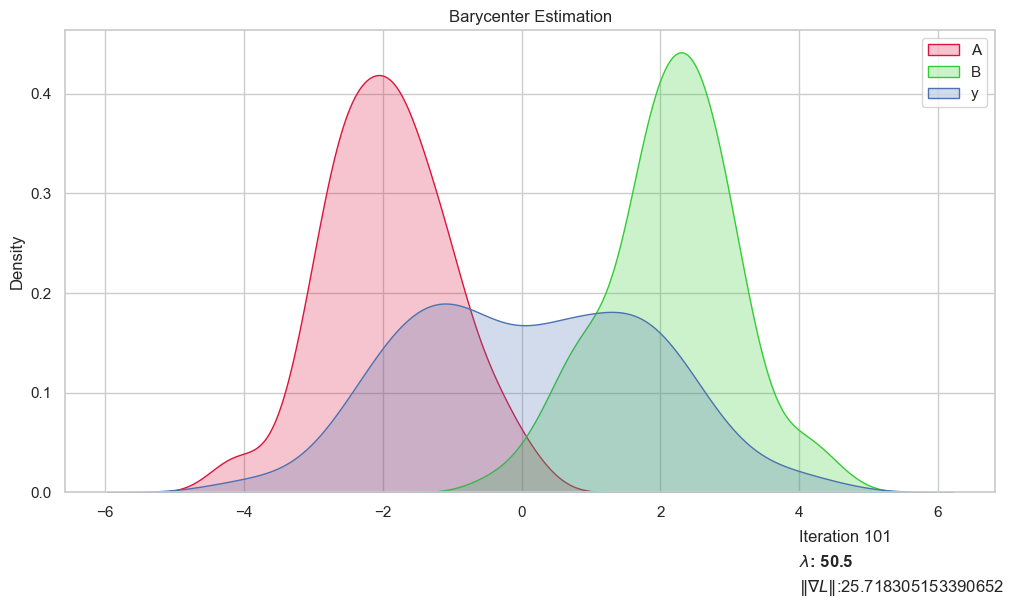

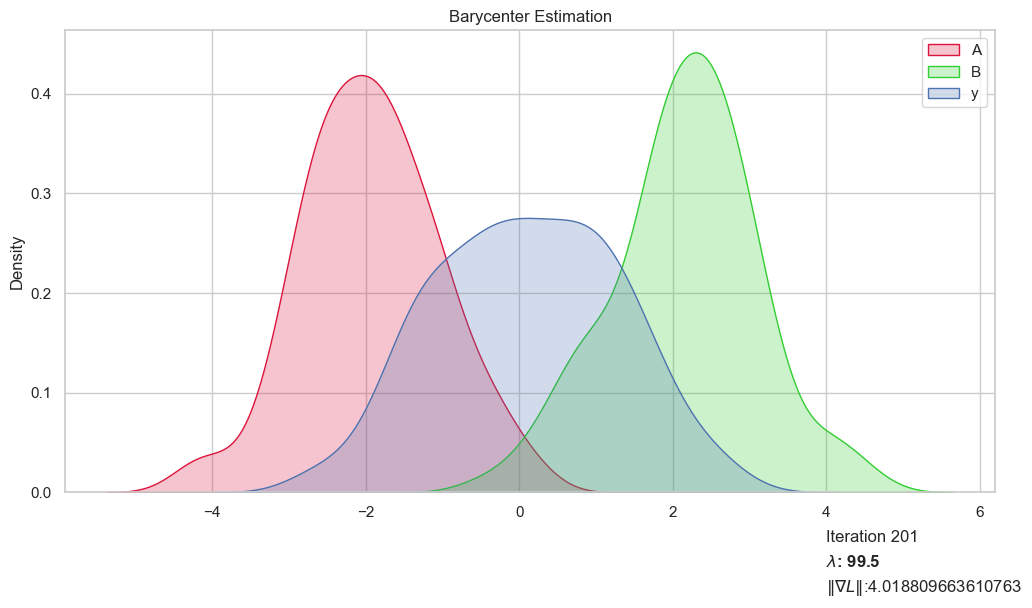

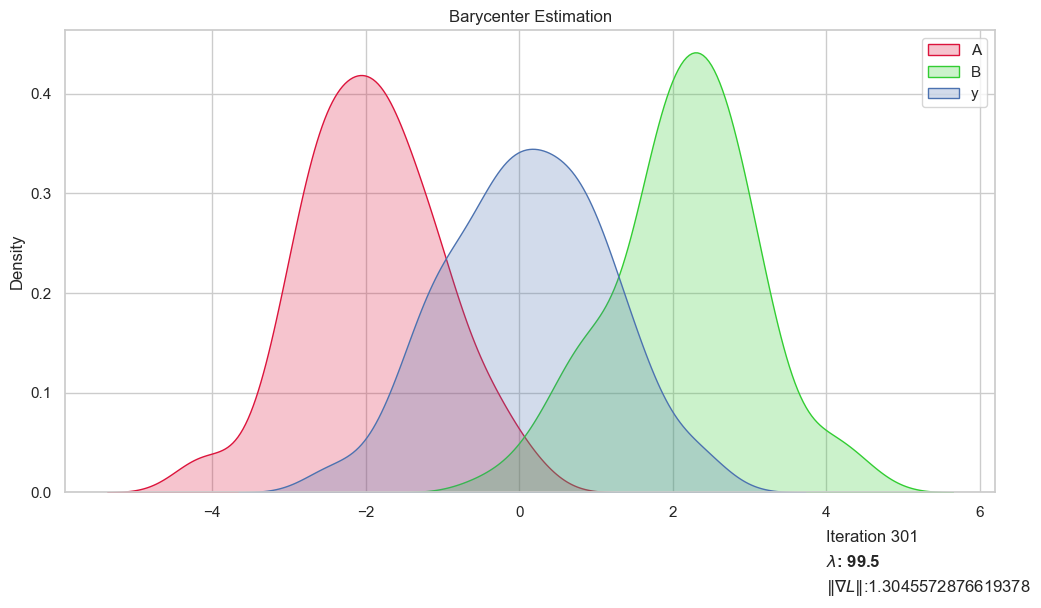

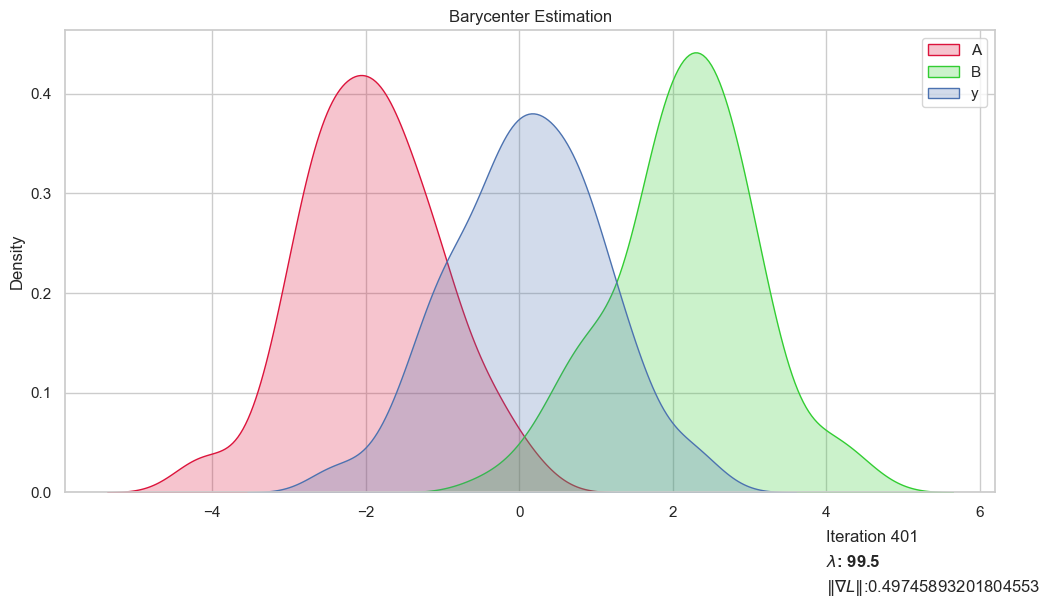

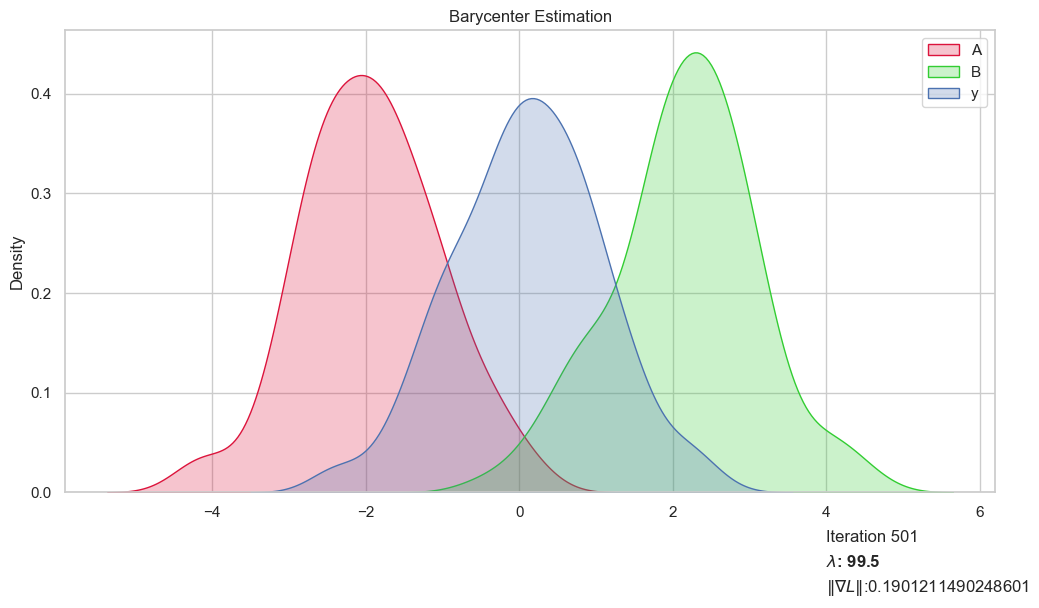

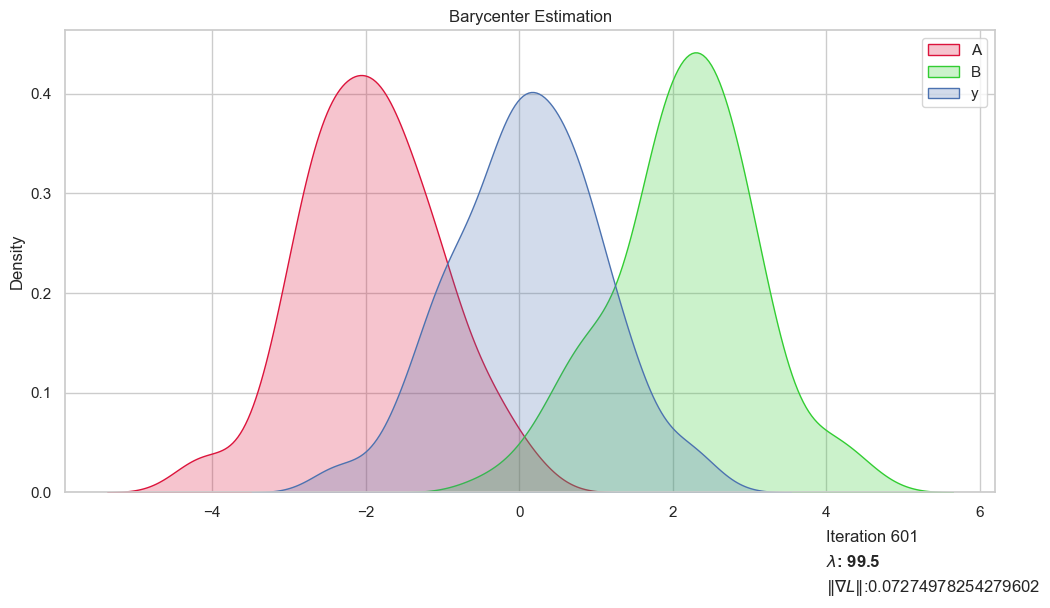

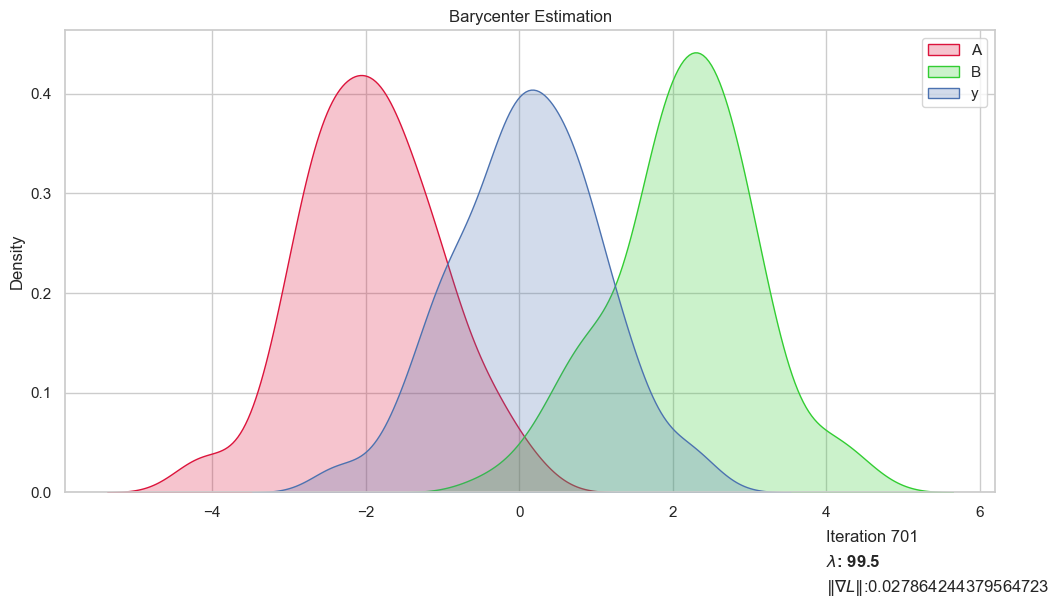

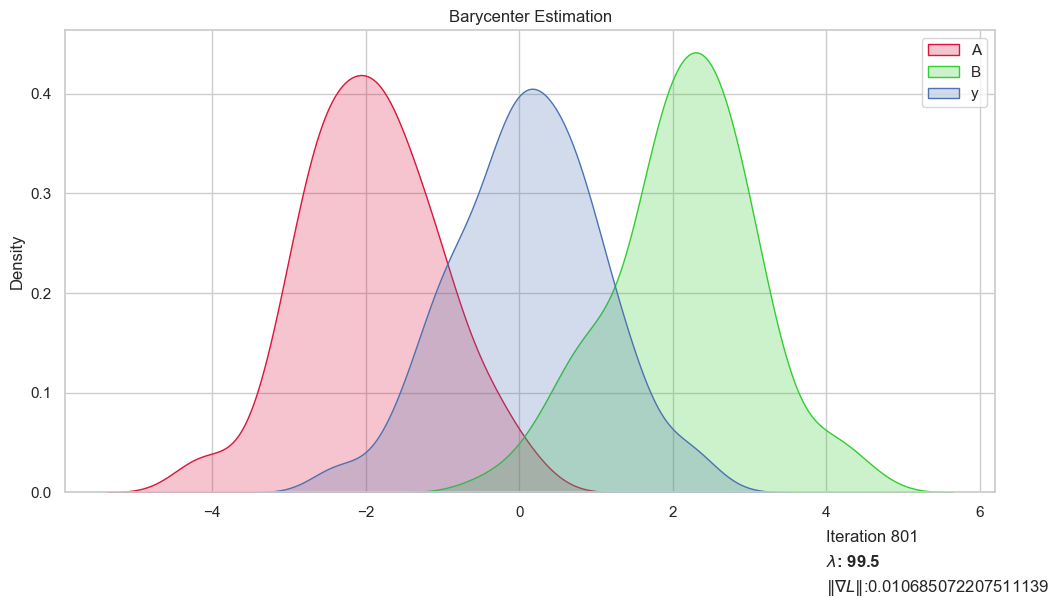

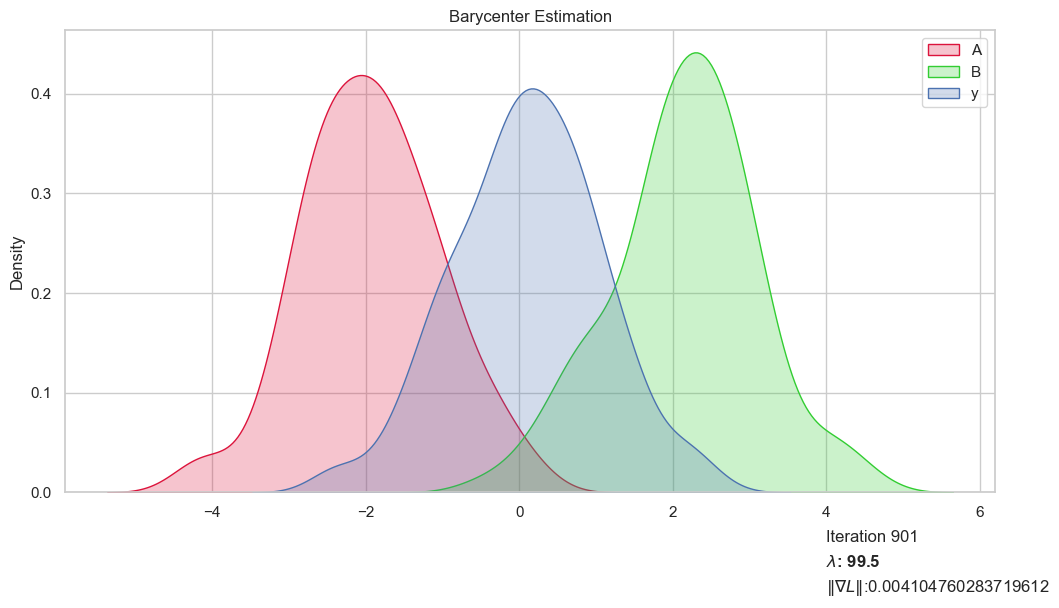

In [7]:
importlib.reload(flow_ot)

y_final = flow_ot.compute_barycenter(X, Z, X, 0, verbose = 0, max_lambda=100, warm_stop=200, monitor=gaussian_monitor)

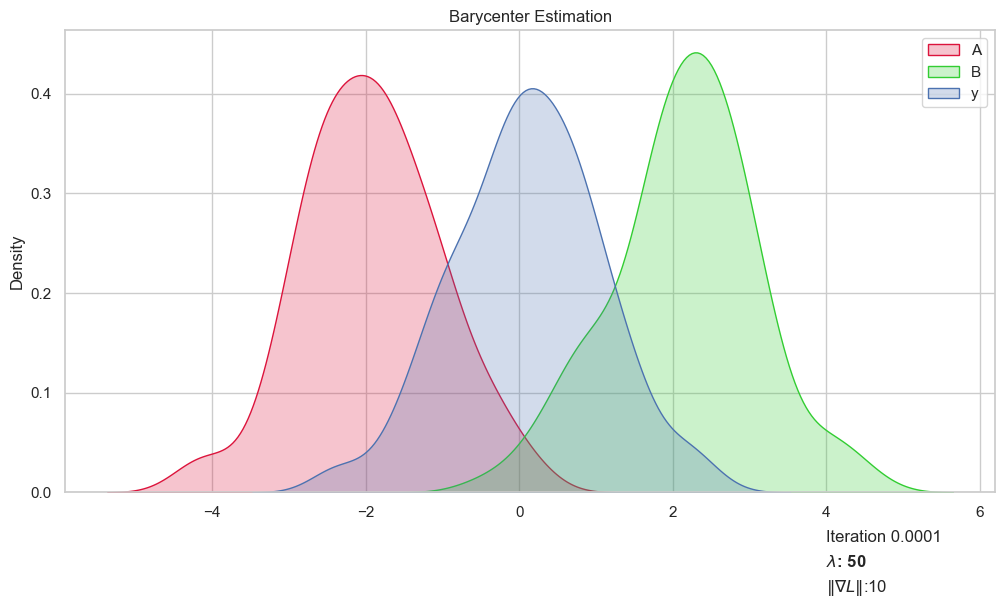

ShapiroResult(statistic=0.995421290397644, pvalue=0.8097497820854187)

In [10]:
kde_barycenter_points(y_final, gauss_a, gauss_b, 50, 10, 0.0001)
shapiro(y_final)